In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
from sklearn.cluster import KMeans

In [8]:
from yellowbrick.cluster import KElbowVisualizer

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn import metrics

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/sailesh3373/data-files/main/phishing_dataset.csv')

In [14]:
df.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


In [15]:
df.tail()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
95905,www.freewebs.com/ryanrules2/,5001,0,1,8035,28,0,0,0,16,2,0
95906,www.ireland-information.com/freecelticfonts.htm,230251,0,1,8400,47,0,0,1,27,2,0
95907,www.clubtaunus.soroptimist.de/img/pro/e.php,10000000,0,0,0,43,0,0,0,29,3,1
95908,www.askmen.com/sports/business/index.html,2008,0,1,9862,41,0,0,0,14,2,0
95909,xosothudo.com.vn/paypal.co.il/paypal.co.il.cgi...,771840,0,0,0,323,0,0,0,16,2,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   domain          95910 non-null  object
 1   ranking         95910 non-null  int64 
 2   isIp            95910 non-null  int64 
 3   valid           95910 non-null  int64 
 4   activeDuration  95910 non-null  int64 
 5   urlLen          95910 non-null  int64 
 6   is@             95910 non-null  int64 
 7   isredirect      95910 non-null  int64 
 8   haveDash        95910 non-null  int64 
 9   domainLen       95910 non-null  int64 
 10  nosOfSubdomain  95910 non-null  int64 
 11  label           95910 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 8.8+ MB


In [17]:
df.isnull().sum()

domain            0
ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
domainLen         0
nosOfSubdomain    0
label             0
dtype: int64

In [18]:
df.describe()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
count,9.591000e+04,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000
mean,6.118618e+06,0.000229,0.573892,3747.876144,69.327442,0.002773,0.007444,0.157856,23.409061,2.387718,0.582984
std,4.835254e+06,0.015144,0.494512,3974.587188,69.740134,0.052591,0.085960,0.364608,25.426852,2.140997,0.493068
min,1.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,3.205600e+04,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,14.000000,2.000000,0.000000
50%,1.000000e+07,0.000000,1.000000,2192.000000,44.000000,0.000000,0.000000,0.000000,17.000000,2.000000,1.000000
75%,1.000000e+07,0.000000,1.000000,7670.000000,78.000000,0.000000,0.000000,0.000000,22.000000,2.000000,1.000000
max,1.000000e+07,1.000000,1.000000,15707.000000,2175.000000,1.000000,1.000000,1.000000,244.000000,34.000000,1.000000


In [19]:
df.corr()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
ranking,1.000000,0.002302,-0.271810,-0.462385,0.104733,0.022798,0.059468,0.103518,0.154659,0.105718,0.516873
isIp,0.002302,1.000000,0.004698,0.000379,-0.001197,-0.000799,-0.001312,-0.002781,0.006634,0.027164,0.012811
valid,-0.271810,0.004698,1.000000,0.812531,-0.050022,-0.023917,-0.026677,-0.128651,-0.126793,-0.174061,-0.266774
activeDuration,-0.462385,0.000379,0.812531,1.000000,-0.133796,-0.026034,-0.047993,-0.150173,-0.178393,-0.178431,-0.523114
urlLen,0.104733,-0.001197,-0.050022,-0.133796,1.000000,0.017182,-0.010021,0.370280,0.497716,0.346738,0.396519
is@,0.022798,-0.000799,-0.023917,-0.026034,0.017182,1.000000,-0.004567,0.000549,-0.002268,-0.003439,0.039777
isredirect,0.059468,-0.001312,-0.026677,-0.047993,-0.010021,-0.004567,1.000000,-0.007222,-0.015948,-0.026618,0.073247
haveDash,0.103518,-0.002781,-0.128651,-0.150173,0.370280,0.000549,-0.007222,1.000000,0.365871,0.250143,0.239623
domainLen,0.154659,0.006634,-0.126793,-0.178393,0.497716,-0.002268,-0.015948,0.365871,1.000000,0.863078,0.231828
nosOfSubdomain,0.105718,0.027164,-0.174061,-0.178431,0.346738,-0.003439,-0.026618,0.250143,0.863078,1.000000,0.113249


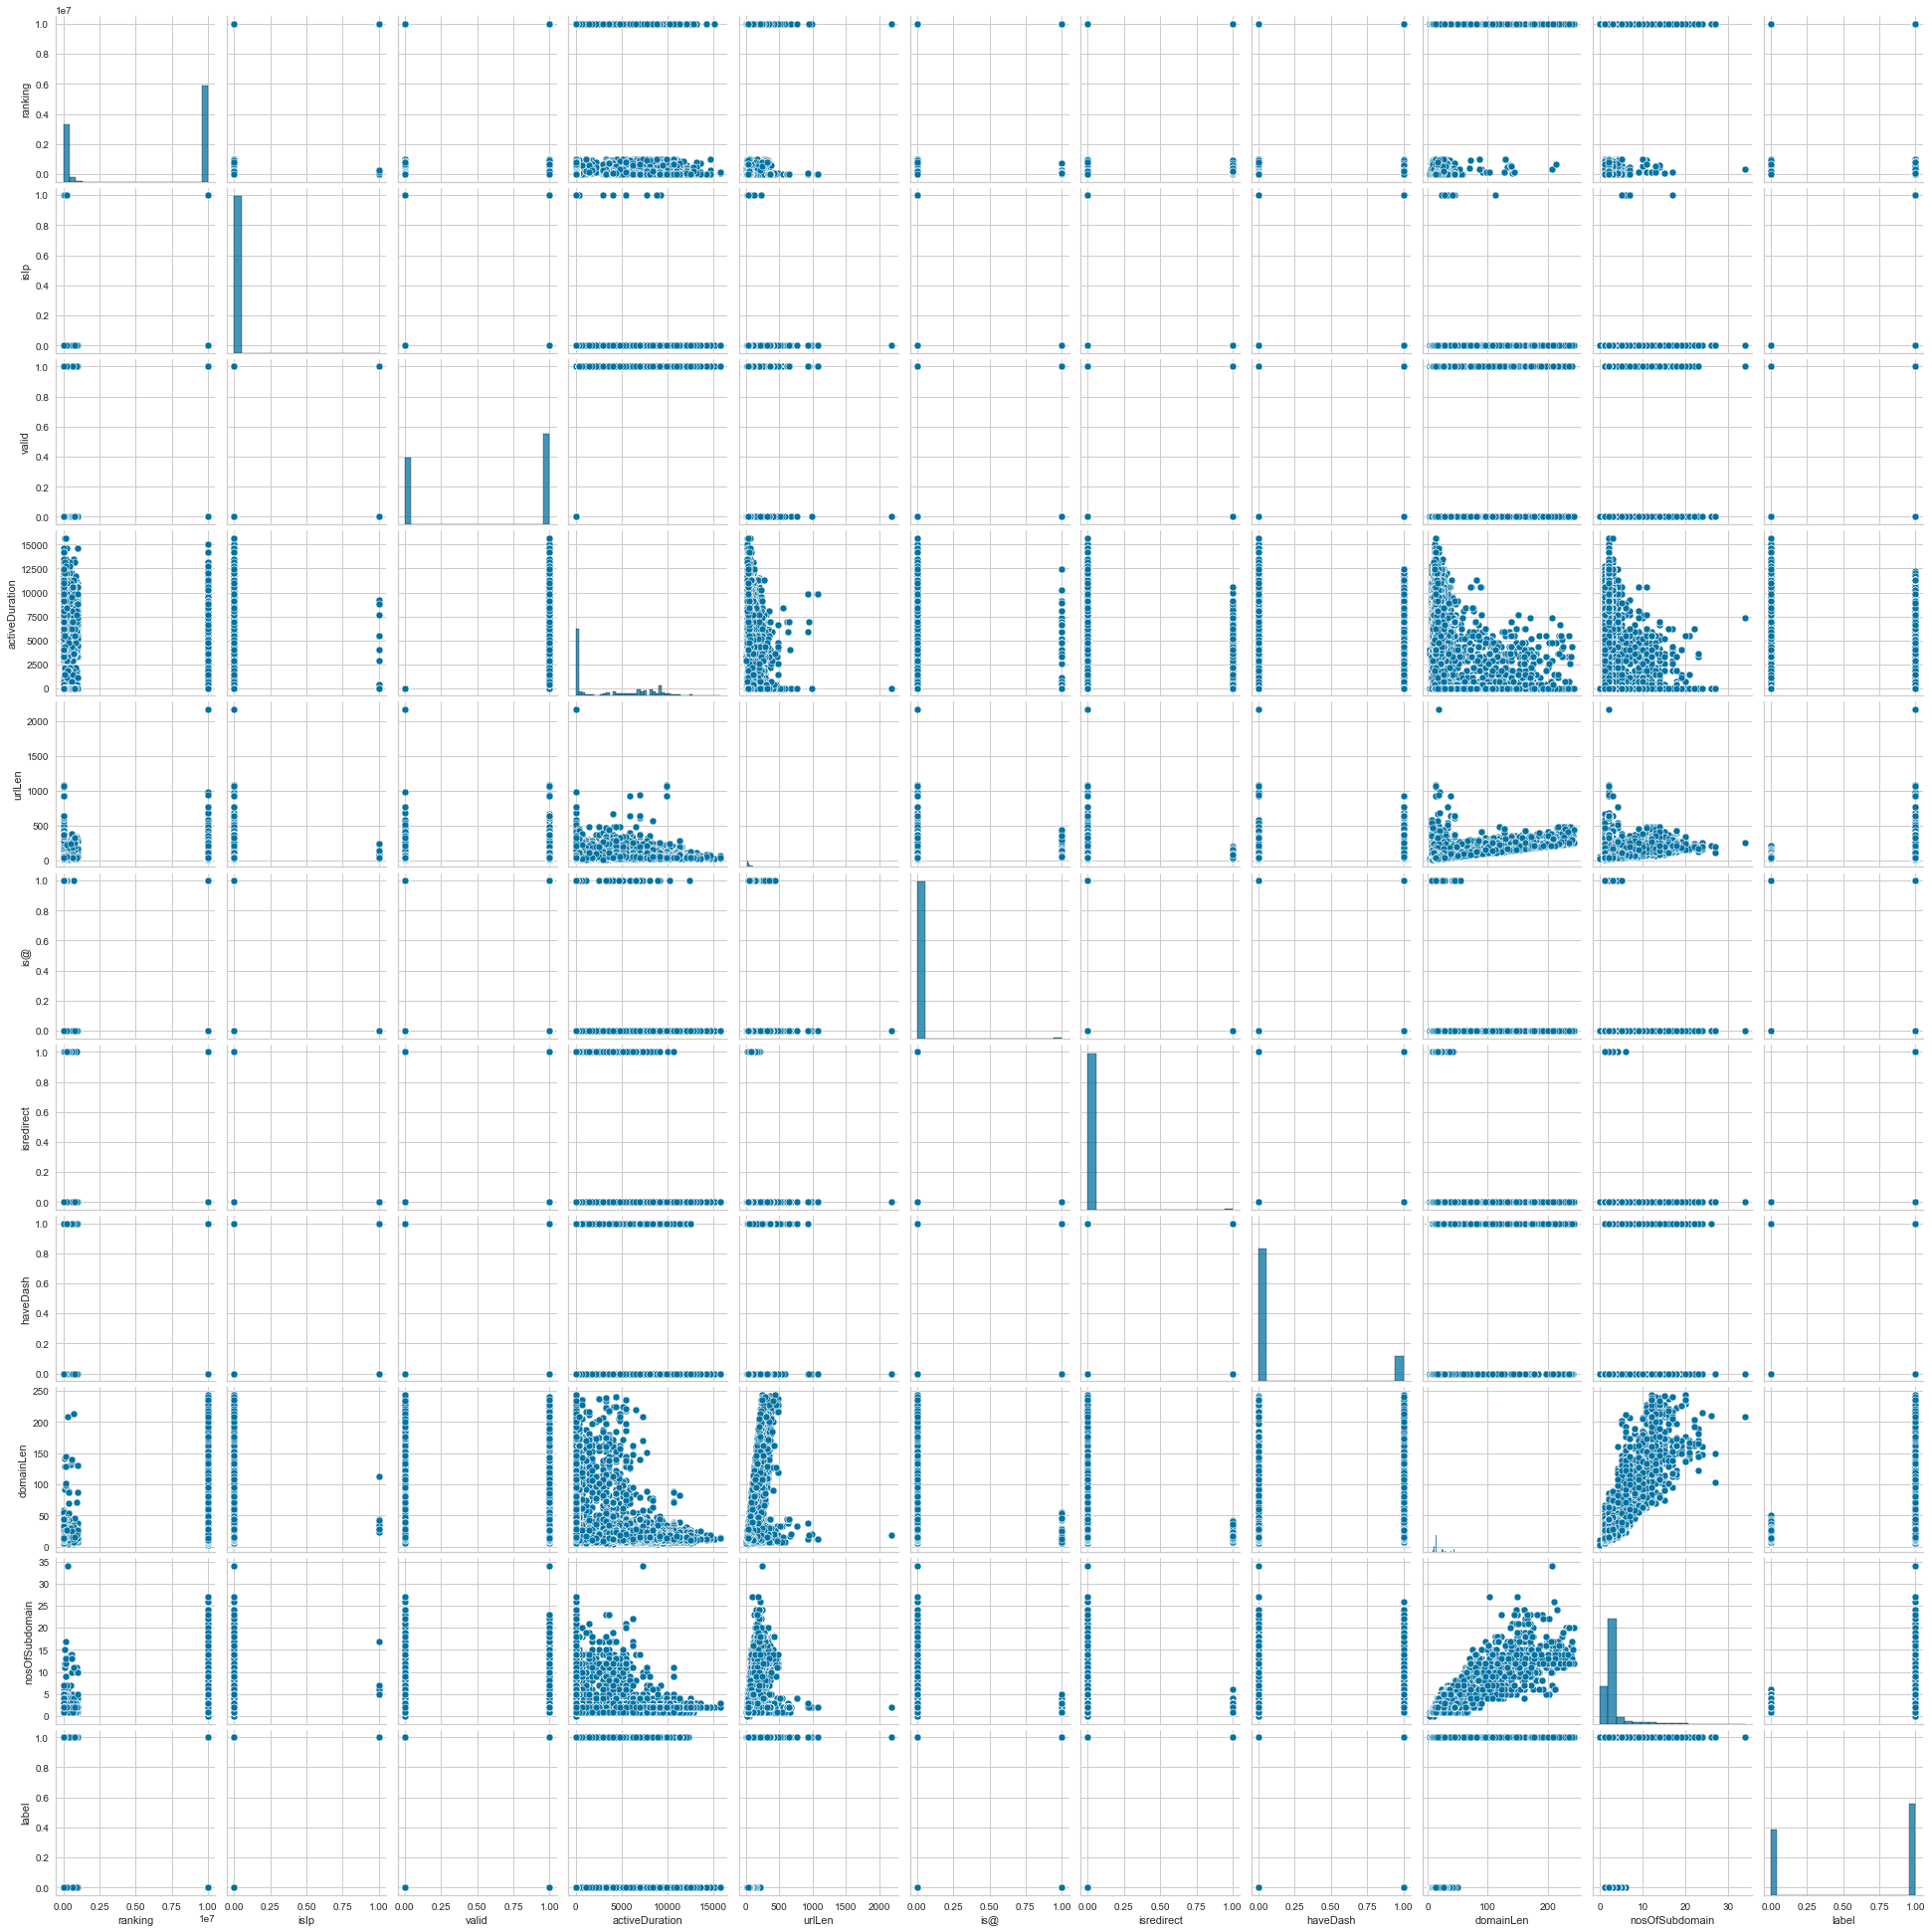

In [20]:
sns_plot = sns.pairplot(df)

In [21]:
print(pd.unique(df['nosOfSubdomain']))
li = list(pd.value_counts(df['nosOfSubdomain']))
li

[ 2  1  3  5  7 10  6 11 12 13  4 14  8  9 21 16 18 15 24 17 23 20 19  0
 22 34 26 27]


[54449,
 22589,
 9784,
 2366,
 1857,
 1200,
 699,
 410,
 394,
 368,
 362,
 350,
 314,
 202,
 187,
 114,
 82,
 54,
 34,
 26,
 18,
 15,
 13,
 12,
 7,
 2,
 1,
 1]

In [22]:
x = df.drop(['label','domain'], axis=1).to_numpy()

In [23]:
x

array([[10000000,        0,        0, ...,        1,       20,        2],
       [  194914,        0,        1, ...,        0,       12,        2],
       [10000000,        0,        0, ...,        0,       14,        1],
       ...,
       [10000000,        0,        0, ...,        0,       29,        3],
       [    2008,        0,        1, ...,        0,       14,        2],
       [  771840,        0,        0, ...,        0,       16,        2]],
      dtype=int64)

In [24]:
y = df['label'].to_numpy()


In [25]:
y

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [26]:
scaler = StandardScaler()
scaler.fit_transform(x)

array([[ 0.80272973, -0.01514709, -1.16052743, ...,  2.30973473,
        -0.13407395, -0.18109302],
       [-1.22511368, -0.01514709,  0.86167718, ..., -0.43295015,
        -0.4487036 , -0.18109302],
       [ 0.80272973, -0.01514709, -1.16052743, ..., -0.43295015,
        -0.37004619, -0.64816751],
       ...,
       [ 0.80272973, -0.01514709, -1.16052743, ..., -0.43295015,
         0.21988442,  0.28598146],
       [-1.26500963, -0.01514709,  0.86167718, ..., -0.43295015,
        -0.37004619, -0.18109302],
       [-1.10579647, -0.01514709, -1.16052743, ..., -0.43295015,
        -0.29138878, -0.18109302]])

In [27]:
kmeans = KMeans(init = 'k-means++', random_state = 77)

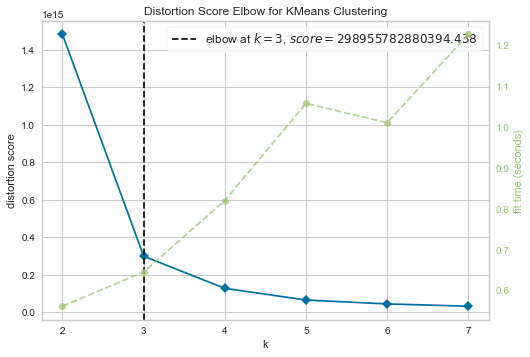

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
visualizer = KElbowVisualizer(kmeans, k=(2,8), timing = False)
visualizer.fit(x)
visualizer.show()

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 77)

In [30]:
classifier = KNeighborsClassifier(n_neighbors = 3)

In [31]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_pred = classifier.predict(x_test)

In [33]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     13258
           1       0.95      0.95      0.95     18393

    accuracy                           0.94     31651
   macro avg       0.94      0.94      0.94     31651
weighted avg       0.94      0.94      0.94     31651



In [34]:
print(metrics.confusion_matrix(y_test, y_pred))

[[12259   999]
 [  938 17455]]


In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators = 300)

In [37]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300)

In [38]:
y_rfc = rfc.predict(x_test)

In [39]:
print(metrics.classification_report(y_test, y_rfc))
print(metrics.confusion_matrix(y_test, y_rfc))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     13258
           1       0.96      0.96      0.96     18393

    accuracy                           0.95     31651
   macro avg       0.95      0.95      0.95     31651
weighted avg       0.95      0.95      0.95     31651

[[12471   787]
 [  676 17717]]
